In [1]:
#To check if the patient visitied more than 2 times within 12 week period

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Desktop = os.path.join(os.path.expanduser("~"), "Desktop")

filepath_root = os.path.join(Desktop, "LBP_Revision")
inclusion_root = os.path.join(filepath_root, "Inclusion_Codes") #inclusion code location
filtered_root = os.path.join(filepath_root, "Filtered_Files") #Filtered data location (Filtered data aggregated all diagnosis by patient)
unfiltered_root = os.path.join(filepath_root, "All_csv_files") #unfiltered data location
combined_root = os.path.join(filepath_root, "LBP_X_Files") #LBP + X filtered location
classify_root = os.path.join(filepath_root, "Sorted_Files") #6 groups location


In [2]:
Project_root = os.path.join(filepath_root, "Project")
root_3_1 = os.path.join(Project_root, "3-1")
root_3_1_CLBP_csv_path = os.path.join(root_3_1,'CLBP.csv')
CLBP = pd.read_csv(root_3_1_CLBP_csv_path, encoding = 'utf8',dtype=str, index_col=0)
root_3_1_nonCLBP_csv_path = os.path.join(root_3_1,'Non_CLBP.csv')
nonCLBP = pd.read_csv(root_3_1_nonCLBP_csv_path, encoding = 'utf8',dtype=str, index_col=0)

In [3]:
CLBP.keys()

Index(['EMPI', 'MGH_MRN', 'Date.prc', 'Date.dia', 'Code_Type.prc', 'Code.prc',
       'Code_Type.dia', 'Code.dia', 'Diagnosis_Name', 'Procedure_Name',
       'Gender_Legal_Sex', 'Age', 'Language', 'Race1', 'Marital_status',
       'Religion', 'Date_Of_Death', 'AgeAtPrc', 'Admit_Date', 'Discharge_Date',
       'Discharge_Disposition', 'diagnosis_list', 'Diagnosis_list_combined',
       'Diagnosis_list_no_NA', 'City', 'State', 'Zip', 'Country',
       'Insurance_1', 'Insurance_2', 'Insurance_3', 'Phone_Code',
       'Physical_Date', 'BMI', 'Height', 'Weight', 'Smoking', 'Alcohol_Use',
       'Helper', 'Date_combined', 'Date_diff', 'CLBP'],
      dtype='object')

,Counts,Percentage (%)
White,532,83.65
Black,31,4.87
Other,30,4.72
Asian,21,3.30
Declined,13,2.04
Unavailable,6,0.94
American Indian or Alaska Native,2,0.31
Unknown,1,0.16


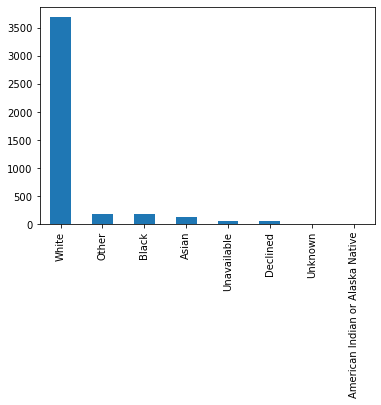

In [4]:
CLBP.Race1.value_counts().plot(kind='bar')
nonCLBP.Race1.value_counts().plot(kind='bar')

pd.concat([nonCLBP.Race1.value_counts(),nonCLBP.Race1.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('Counts','Percentage (%)'))
pd.concat([CLBP.Race1.value_counts(),CLBP.Race1.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('Counts','Percentage (%)'))

In [5]:
'''
CLBP_nonCLBP_race = pd.DataFrame({'CLBP': CLBP.Race1.value_counts(), 'nonCLBP': nonCLBP.Race1.value_counts()})
nonCLBP.Language.value_counts().plot(kind='pie')
nonCLBP.Language.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
CLBP_nonCLBP_language = pd.DataFrame({'CLBP': CLBP.Language.value_counts(), 'nonCLBP': nonCLBP.Language.value_counts()})
axes = CLBP_nonCLBP_language.plot.bar(rot=0, subplots=True)
axes[0].legend(loc=2)  
pd.concat([CLBP.Language.value_counts(),CLBP.Language.value_counts(normalize=True).mul(100).round(2),nonCLBP.Language.value_counts(),nonCLBP.Language.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))
pd.concat([CLBP.Religion.value_counts(),CLBP.Religion.value_counts(normalize=True).mul(100).round(2),nonCLBP.Religion.value_counts(),nonCLBP.Religion.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))
'''

"\nCLBP_nonCLBP_race = pd.DataFrame({'CLBP': CLBP.Race1.value_counts(), 'nonCLBP': nonCLBP.Race1.value_counts()})\nnonCLBP.Language.value_counts().plot(kind='pie')\nnonCLBP.Language.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'\nCLBP_nonCLBP_language = pd.DataFrame({'CLBP': CLBP.Language.value_counts(), 'nonCLBP': nonCLBP.Language.value_counts()})\naxes = CLBP_nonCLBP_language.plot.bar(rot=0, subplots=True)\naxes[0].legend(loc=2)  \npd.concat([CLBP.Language.value_counts(),CLBP.Language.value_counts(normalize=True).mul(100).round(2),nonCLBP.Language.value_counts(),nonCLBP.Language.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))\npd.concat([CLBP.Religion.value_counts(),CLBP.Religion.value_counts(normalize=True).mul(100).round(2),nonCLBP.Religion.value_counts(),nonCLBP.Religion.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%

In [6]:
def sumtoother(input_list, column_name, if_other):
    sum_data = pd.DataFrame(columns = ['category','CLBP Counts','nonCLBP Counts'])
    nonother_CLBP,nonother_nonCLBP = 0,0
    for i in input_list:
        #sum_data = sum_data.append({'category' : i, 'CLBP_counts' : (CLBP[column_name] == i).sum(), 'non_CLBP_counts' : (nonCLBP[column_name] == i).sum()},ignore_index=True)
        df_dictionary = pd.DataFrame.from_dict([{'category' : i, 'CLBP Counts' : (CLBP[column_name] == i).sum(), 'nonCLBP Counts' : (nonCLBP[column_name] == i).sum()}])
        sum_data = pd.concat([sum_data, df_dictionary],ignore_index=True)
    if if_other == True:
        other_category, other_CLBP, other_nonCLBP = 'other', 0,0
        for j in CLBP[column_name]:
            if j not in input_list:
                other_CLBP += 1
        for k in nonCLBP[column_name]:
            if k not in input_list:
                other_nonCLBP += 1
        #sum_data = sum_data.append({'category' : other_category, 'CLBP_counts' : other_CLBP, 'non_CLBP_counts' : other_nonCLBP},ignore_index=True)
        df_dictionary_other = pd.DataFrame.from_dict([{'category' : other_category, 'CLBP Counts' : other_CLBP, 'nonCLBP Counts' : other_nonCLBP}])
        sum_data = pd.concat([sum_data, df_dictionary_other],ignore_index=True)
    return sum_data

    

In [7]:
Race = sumtoother(['White','Black','American Indian or Alaska Native','Other','Asian'],'Race1',True)
Language = sumtoother(['English','Spanish'],'Language',True)
Religion = sumtoother(['Catholic', 'Jewish', 'Baptist', 'Protestant', 'Christian', 'Methodist', 'Orthodox', 'Episcopal', 'Islamic', 'Buddhist', 'Presbyterian'],'Religion',True)
Gender = sumtoother(['Female','Male'],'Gender_Legal_Sex',False)



In [8]:
marital_status = sumtoother(['Married','Single','Partner','Widowed','Divorced'],'Marital_status',False)
#marital_status.CLBP_counts.sum()
#marital_status[['CLBP_counts','non_CLBP_counts']].astype(float)
marital_status

,category,CLBP Counts,nonCLBP Counts
0,Married,321,2082
1,Single,152,1036
2,Partner,5,39
3,Widowed,73,646
4,Divorced,69,423


In [10]:
def add_percentage_column(x):
    CLBP_sum = x['CLBP Counts'].sum()
    nonCLBP_sum = x['nonCLBP Counts'].sum()
    x['CLBP percentage (%)'] = x['CLBP Counts'] / CLBP_sum * 100
    x['nonCLBP percentage (%)'] = x['nonCLBP Counts'] / nonCLBP_sum * 100
    x = x[['CLBP Counts', 'CLBP percentage (%)','nonCLBP Counts','nonCLBP percentage (%)']]
    return x


In [11]:
marital_status = add_percentage_column(marital_status)
Race = add_percentage_column(Race)
Language = add_percentage_column(Language)
Religion = add_percentage_column(Religion)
Gender = add_percentage_column(Gender)


In [12]:
#'Smoking', 'Alcohol_Use'
Smoking = pd.concat([CLBP.Smoking.value_counts(),CLBP.Smoking.value_counts(normalize=True).mul(100).round(2),nonCLBP.Smoking.value_counts(),nonCLBP.Smoking.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))
#Smoking.ind.names = ['Class']
#Smoking.reset_index(level=0,inplace=True)
Smoking
'Smokeless Tobacco Use-Never Used', 'Tobacco User-Never', 'Smoking Tobacco Use-Never Smoker' #never
'Tobacco User-Quit', 'Smoking Tobacco Use-Former Smoker' #quit
'Smokeless Tobacco Use-Unknown','Smokeless Tobacco Use-Former User','Smokeless Tobacco Use-Current User' #Smokeless Tobacco
'Tobacco Used Years','Smoking Tobacco Use-Current Every Day Smoker', 'Tobacco User-Yes' #Smoking 
'Smoking Tobacco Use-Light Tobacco Smoker','Smoking Tobacco Use-Current Some Day Smoker','Smoking Tobacco Use-Passive Smoke Exposure - Never Smoker' #Light Smoking
'Smoking Tobacco Use-Never Assessed','Tobacco User-Not Asked','Tobacco User-Passive' #Other


#Smoking_sum = pd.DataFrame(columns = ['category','CLBP_counts','non_CLBP_counts'])

('Smoking Tobacco Use-Never Assessed',
 'Tobacco User-Not Asked',
 'Tobacco User-Passive')

In [13]:
never = Smoking.loc[['Smokeless Tobacco Use-Never Used', 'Tobacco User-Never', 'Smoking Tobacco Use-Never Smoker']].sum()
never.name = 'Never'
quit = Smoking.loc[['Tobacco User-Quit', 'Smoking Tobacco Use-Former Smoker']].sum()
quit.name = 'Quit'
smokeless = Smoking.loc[['Smokeless Tobacco Use-Unknown','Smokeless Tobacco Use-Former User','Smokeless Tobacco Use-Current User']].sum()
smokeless.name = 'Smokeless tobacco'
smoking_tobacco = Smoking.loc[['Tobacco Used Years','Smoking Tobacco Use-Current Every Day Smoker', 'Tobacco User-Yes']].sum()
smoking_tobacco.name = 'Smoking tobacco'
light_smoke = Smoking.loc[['Smoking Tobacco Use-Light Tobacco Smoker','Smoking Tobacco Use-Current Some Day Smoker','Smoking Tobacco Use-Passive Smoke Exposure - Never Smoker']].sum()
light_smoke.name = 'Light smoke'
smoke_other = Smoking.loc[['Smoking Tobacco Use-Never Assessed','Tobacco User-Not Asked','Tobacco User-Passive']].sum()
smoke_other.name = 'Other'


'''
Smoking_classify = pd.DataFrame(columns = ['CLBP Counts', 'CLBP Percentage (%)', 'nonCLBP Counts', 'nonCLBP Percentage (%)'])
Smoking_classify = Smoking_classify.append(never.transpose())
Smoking_classify = Smoking_classify.append(quit.transpose())
Smoking_classify = Smoking_classify.append(smokeless.transpose())
Smoking_classify = Smoking_classify.append(smoking_tobacco.transpose())
Smoking_classify = Smoking_classify.append(light_smoke.transpose())
Smoking_classify = Smoking_classify.append(smoke_other.transpose())
'''
Smoking_classify = pd.concat([never,quit,smokeless,smoking_tobacco,light_smoke,smoke_other],axis = 1).transpose()
Smoking_classify

,CLBP Counts,CLBP Percentage (%),nonCLBP Counts,nonCLBP Percentage (%)
Never,405.0,65.22,2738.0,65.66
Quit,83.0,13.37,410.0,9.83
Smokeless tobacco,69.0,11.11,688.0,16.50
Smoking tobacco,61.0,9.82,317.0,7.61
Light smoke,0.0,0.00,7.0,0.17
Other,3.0,0.48,10.0,0.24


In [14]:
Alcohol_use = pd.concat([CLBP.Alcohol_Use.value_counts(),CLBP.Alcohol_Use.value_counts(normalize=True).mul(100).round(2),nonCLBP.Alcohol_Use.value_counts(),nonCLBP.Alcohol_Use.value_counts(normalize=True).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))
No_Alcohol = Alcohol_use.loc[['Alcohol User-No', 'Alcohol User-Not Currently', 'Alcohol User-Never']].sum()
No_Alcohol.name = 'No Alcohol'
Other_Alcohol = Alcohol_use.loc[['Alcohol User-Not Asked', 'Alcohol Use Screening']].sum()
Other_Alcohol.name = 'Other'

Alcohol_classify = pd.concat([No_Alcohol, Alcohol_use.loc['Alcohol User-Yes'],Other_Alcohol],axis = 1).transpose()
Alcohol_classify


,CLBP Counts,CLBP Percentage (%),nonCLBP Counts,nonCLBP Percentage (%)
No Alcohol,349.0,58.26,2019.0,53.53
Alcohol User-Yes,235.0,39.23,1640.0,43.48
Other,15.0,2.51,113.0,2.99


In [15]:
bmi_CLBP = CLBP['BMI'].astype(float)
bmi_nonCLBP = nonCLBP['BMI'].astype(float)
bins = [-np.inf,18.5, 24.9, 29.9, np.inf]
labels = ["underweight","healthy","overweight","obese"]
BMI_CLBP_classify = pd.DataFrame(columns=['BMI Label'])
BMI_CLBP_classify = pd.cut(bmi_CLBP, bins=bins, labels=labels)
BMI_CLBP_classify
BMI_nonCLBP_classify = pd.DataFrame(columns=['BMI Label'])
BMI_nonCLBP_classify = pd.cut(bmi_nonCLBP, bins=bins, labels=labels)

BMI_classify = pd.concat([BMI_CLBP_classify.value_counts(dropna=False),BMI_CLBP_classify.value_counts(normalize=True,dropna=False).mul(100).round(2),BMI_nonCLBP_classify.value_counts(dropna=False),BMI_nonCLBP_classify.value_counts(normalize=True,dropna=False).mul(100).round(2)], axis = 1, keys=('CLBP Counts','CLBP Percentage (%)','nonCLBP Counts','nonCLBP Percentage (%)'))
BMI_classify



,CLBP Counts,CLBP Percentage (%),nonCLBP Counts,nonCLBP Percentage (%)
obese,162,25.47,934,21.62
overweight,159,25.00,1052,24.35
NaN,155,24.37,1269,29.37
healthy,139,21.86,970,22.45
underweight,21,3.30,96,2.22


In [16]:
#Race.reset_index(level=0)
Race

,CLBP Counts,CLBP percentage (%),nonCLBP Counts,nonCLBP percentage (%)
0,532,83.647799,3694,85.48947
1,31,4.874214,185,4.281416
2,2,0.314465,6,0.138857
3,30,4.716981,186,4.304559
4,21,3.301887,128,2.962277
5,20,3.144654,122,2.823421


In [17]:
root_3_1_classification = os.path.join(root_3_1,'Classification.xlsx')

with pd.ExcelWriter(root_3_1_classification) as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    Race.to_excel(writer, sheet_name="Race")
    Language.to_excel(writer, sheet_name="Language")
    Religion.to_excel(writer, sheet_name="Religion")
    Gender.to_excel(writer, sheet_name="Gender")
    marital_status.to_excel(writer, sheet_name="marital_status")
    Smoking_classify.to_excel(writer, sheet_name="Smoking")
    Alcohol_classify.to_excel(writer, sheet_name="Alcohol")
    BMI_classify.to_excel(writer, sheet_name="BMI")

In [20]:
zipcode = pd.concat([nonCLBP.Zip.value_counts(),CLBP.Zip.value_counts()], axis = 1, keys=('NonCLBP Counts','CLBP Counts'))
root_3_1_zipcode = os.path.join(root_3_1,'Zipcode.xlsx')

with pd.ExcelWriter(root_3_1_zipcode) as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    zipcode.to_excel(writer, sheet_name="Zipcode")